In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Input dataset into python

In [3]:
iris=pd.read_excel(r"D:\DSA - ICT\Week 11\Case study\iris (1).xls")

In [4]:
#Display first 5 rows
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Check the shape of dataset
iris.shape

(150, 5)

In [6]:
#Check basic information of the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Check basic statistics summary of the dataset
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Check the null values
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#Handling the null values
iris["SL"].fillna(iris["SL"].mean(),inplace=True)
iris["SW"].fillna(iris["SW"].mean(),inplace=True)
iris["PL"].fillna(iris["PL"].mean(),inplace=True)

In [10]:
#Check null values after filling 
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
# The null values have been handled and now there are no missing values

In [12]:
#Check the data type of features
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

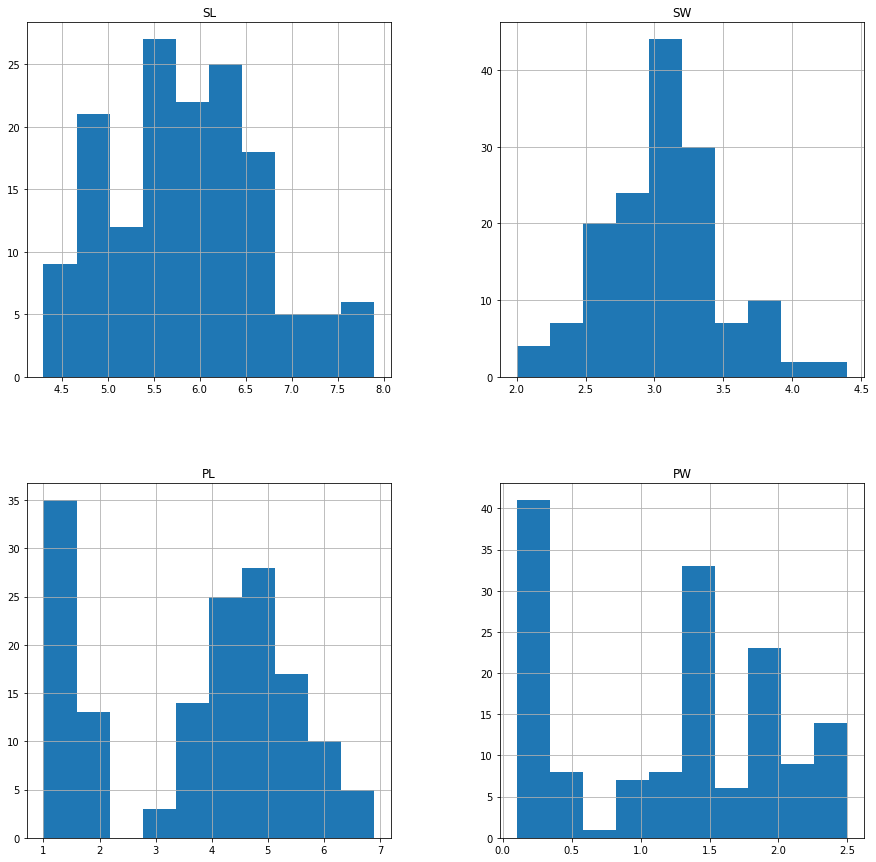

In [13]:
#Check the distribution of the dataset
iris.hist(figsize=(15,15))
plt.show()

In [14]:
#We can see that PL and PW there is a seperation between the values , this might be of the 3 categories of the target

<AxesSubplot:>

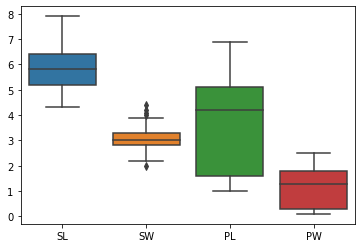

In [15]:
#Check for outliers in the dataset
sns.boxplot(data=iris)

In [16]:
# There are some outliers in the SW data , others have no outliers

In [17]:
#Hanlding the outliers using IQR technique
Q1 = np.percentile(iris["SW"],25,interpolation = 'midpoint')
Q2 = np.percentile(iris["SW"],50,interpolation = 'midpoint')
Q3 = np.percentile(iris["SW"],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  0.4500000000000002
Lower limit is 2.1249999999999996
Upper Limit is 3.9250000000000003


In [18]:
#Replacing the outliers with the upper limit and lower limit values
iris["SW"]=np.where(iris["SW"]>upper_limit,upper_limit,np.where(iris["SW"]<lower_limit,lower_limit,iris["SW"]))

<AxesSubplot:>

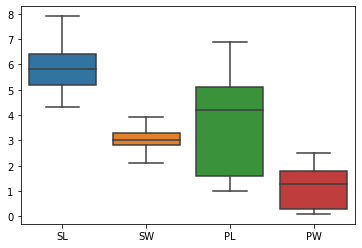

In [19]:
#Checking once again for outliers after handling 
sns.boxplot(data=iris)

In [20]:
#There are no outliers now, the outliers found in SW were handled

<Figure size 720x720 with 0 Axes>

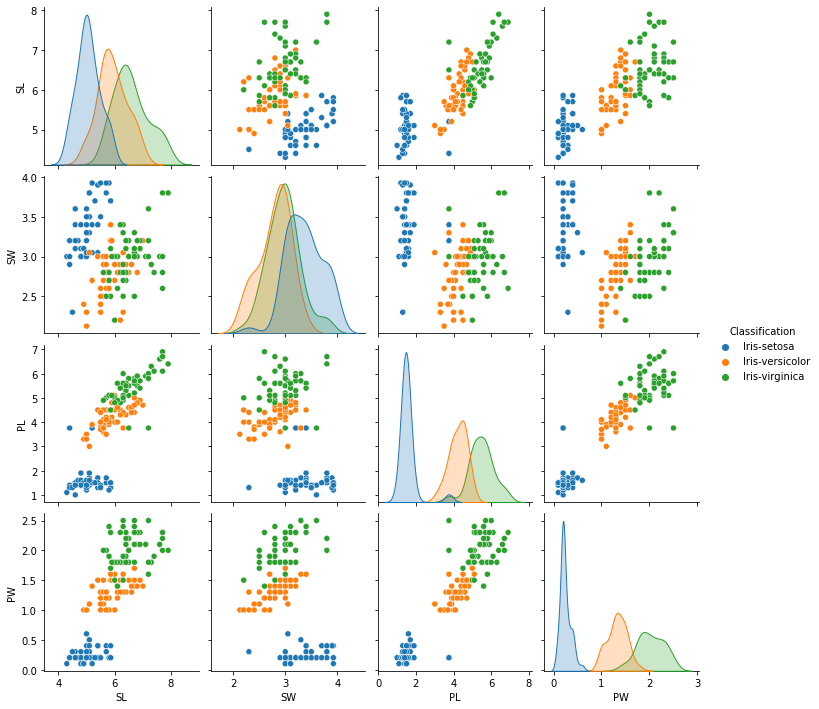

In [21]:
#Overall visualisation of the features against each other is plotted
plt.figure(figsize=(10,10))
sns.pairplot(data=iris,hue='Classification')
plt.show()

In [22]:
#Do label encoding for the target variable as it is of object type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris["Classification"]=(le.fit_transform(iris["Classification"]))

<AxesSubplot:>

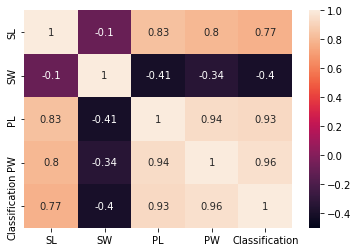

In [23]:
#Check the correlation between features and target
sns.heatmap(iris.corr(),vmin=-0.5,vmax=1.0,annot=True)

In [24]:
#From  the above we can see that PL and PW have high correlation with each other 
# SL and SW have weak correlation 
#PL and PW also have high correlation with the target variable 
#SW has the negative correlation with target , all others have high correlation with target

In [25]:
#Split the dataset into features and target
X = iris.drop(['Classification'],axis=1)
y = iris['Classification']

In [26]:
#Checking the imbalance
y.value_counts(normalize=True).to_frame()

,Classification
0,0.333333
1,0.333333
2,0.333333


In [27]:
# The dataset is perfectly balanced dataset

In [28]:
# perform min max scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [29]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [30]:
#Check for shape of each data set
print("Shape of X_train", X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_train",y_train.shape)
print("Shape of Y_test",y_test.shape)

Shape of X_train (112, 4)
Shape of X_test (38, 4)
Shape of Y_train (112,)
Shape of Y_test (38,)


In [31]:
# Apply various Machine learning models on the dataset

In [32]:
#1. Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

y_predict=log_model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print("Results from logistic regression are as below")
print(classification_report(y_predict,y_test))
print("Confusion Matrix \n" ,confusion_matrix(y_predict,y_test))

Results from logistic regression are as below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix 
 [[15  0  0]
 [ 0 10  0]
 [ 0  1 12]]


In [35]:
#2. Support vector machine
# Here from the pairplot we can see that there is some non linearity between some features , hence will use rbf kernal

In [36]:
from sklearn.svm import SVC
SV=SVC(kernel="rbf")
SV.fit(X_train,y_train)
y_pred=SV.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print("Results from SVM are as below")
print(classification_report(y_pred,y_test))
print("Confusion Matrix \n" ,confusion_matrix(y_pred,y_test))

Results from SVM are as below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix 
 [[15  0  0]
 [ 0 10  0]
 [ 0  1 12]]


In [38]:
#3. KNN

[0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Accuracy')

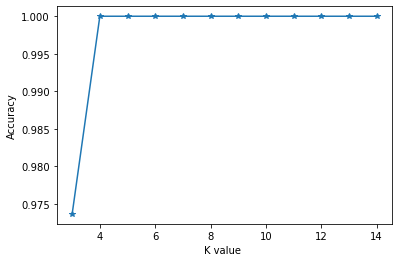

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    KNN=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    KNN.fit(X_train,y_train)
    y_pred1=KNN.predict(X_test)
    acc=accuracy_score(y_test,y_pred1)
    KNN_values.append(acc)
print(KNN_values)   
plt.plot(neighbours,KNN_values,"*-")
plt.xlabel("K value ")
plt.ylabel("Accuracy")

In [40]:
KNN=KNeighborsClassifier(n_neighbors=4,metric="minkowski")
KNN.fit(X_train,y_train)
y_pred1=KNN.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print("Results from KNN are as below")
print(classification_report(y_pred1,y_test))
print("Confusion Matrix \n" ,confusion_matrix(y_pred1,y_test))

Results from KNN are as below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [42]:
#4. DecisionTree

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred2 = DT.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print("Results from Decision Tree are as below")
print(classification_report(y_pred2,y_test))
print("Confusion Matrix \n" ,confusion_matrix(y_pred2,y_test))

Results from Decision Tree are as below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [45]:
#4. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=400,max_depth=10,random_state = 30,criterion='gini',max_features='auto')
RF.fit(X_train,y_train) 
y_pred3 = RF.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print("Results from Random Forest are as below")
print(classification_report(y_pred3,y_test))
print("Confusion Matrix \n" ,confusion_matrix(y_pred3,y_test))

Results from Random Forest are as below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [48]:
#5. Gradient boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
model = GB.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print("Results from Gradient Boosting are as below")
print(classification_report(y_pred4,y_test))
print("Confusion Matrix \n" ,confusion_matrix(y_pred4,y_test))

Results from Gradient Boosting are as below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [51]:
#6. Xtreme Gradient Boosting

In [52]:
from xgboost import XGBClassifier 
xgb= XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)
y_pred5 = xgb_model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print("Results from Xtreme Gradient Boosting are as below")
print(classification_report(y_pred5,y_test))
print("Confusion Matrix \n" ,confusion_matrix(y_pred,y_test))

Results from Xtreme Gradient Boosting are as below
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix 
 [[15  0  0]
 [ 0 10  0]
 [ 0  1 12]]


In [54]:
from tabulate import tabulate
print(tabulate([['Logistic regression', 0.97,0.97 ,0.97,0.97], ['SVM', 0.97 ,0.97  ,0.97 ,0.97 ],["KNN",1.00,1.00 ,1.00,1.00],["Desicion Tree",1.00 ,1.00,1.00,1.00],["Random Forest",1.00 ,1.00 ,1.00,1.00],["Gradient Boosting",1.00,1.00,1.00,1.00],["Xtreme Gradient boosting",1.00,1.00,1.00,1.00]], headers=['Model classification', 'Accuracy','Macro Average Precision Score','Macro Average Recall Score','Macro Average F1 score ']))

Model classification        Accuracy    Macro Average Precision Score    Macro Average Recall Score    Macro Average F1 score
------------------------  ----------  -------------------------------  ----------------------------  -------------------------
Logistic regression             0.97                             0.97                          0.97                       0.97
SVM                             0.97                             0.97                          0.97                       0.97
KNN                             1                                1                             1                          1
Desicion Tree                   1                                1                             1                          1
Random Forest                   1                                1                             1                          1
Gradient Boosting               1                                1                             1                         

In [55]:
#Since the data is highly balanced , all the models are showing high accuracy.
#Among all the 6 , Logistic regression and SVM have slightly less but still high accuracy of 0.97 
# Rest all 4 have accuracy of 1. So for this particular dataset , we can use any of the 4 due to the balanced data
#(Due to the balanced data have taken macro average instead of weighted average which will be taken when imbalance is there)